In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

df=pd.read_csv('PRMI.tenv3', sep=' ', skipinitialspace=True, index_col=0)
df

,YYMMMDD,yyyy.yyyy,__MJD,week,d,reflon,_e0(m),__east(m),____n0(m),_north(m),...,_ant(m),sig_e(m),sig_n(m),sig_u(m),__corr_en,__corr_eu,__corr_nu,_latitude(deg),_longitude(deg),__height(m)
site,,,,,,,,,,,,,,,,,,,,,
PRMI,06MAR28,2006.2368,53822,1368,2,-67.0,-4805,-0.884004,1987705,0.532996,...,0.0,0.000888,0.000771,0.003362,-0.064404,0.011868,-0.017335,17.970398,-67.045372,-25.47902
PRMI,06MAR29,2006.2396,53823,1368,3,-67.0,-4805,-0.885934,1987705,0.531532,...,0.0,0.000883,0.000787,0.003479,-0.044832,0.022409,0.015084,17.970398,-67.045372,-25.47544
PRMI,06MAR30,2006.2423,53824,1368,4,-67.0,-4805,-0.883398,1987705,0.533405,...,0.0,0.000907,0.000783,0.003525,-0.059550,0.001581,-0.035045,17.970398,-67.045372,-25.48387
PRMI,06MAR31,2006.2450,53825,1368,5,-67.0,-4805,-0.883028,1987705,0.532533,...,0.0,0.000868,0.000782,0.003389,-0.059340,0.021626,0.008467,17.970398,-67.045372,-25.49011
PRMI,06APR01,2006.2478,53826,1368,6,-67.0,-4805,-0.884623,1987705,0.533207,...,0.0,0.000884,0.000774,0.003397,-0.068011,0.016278,0.010716,17.970398,-67.045372,-25.48371
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
PRMI,23FEB21,2023.1403,59996,2250,2,-67.0,-4805,-0.776582,1987705,0.788863,...,0.0,0.000765,0.000671,0.002846,-0.048635,0.026694,0.005703,17.970400,-67.045371,-25.48129
PRMI,23FEB22,2023.1431,59997,2250,3,-67.0,-4805,-0.773333,1987705,0.787890,...,0.0,0.000780,0.000682,0.002883,-0.057148,-0.020222,0.021192,17.970400,-67.045371,-25.47467
PRMI,23FEB23,2023.1458,59998,2250,4,-67.0,-4805,-0.772391,1987705,0.787792,...,0.0,0.000773,0.000692,0.002912,-0.019902,0.037561,0.030347,17.970400,-67.045371,-25.47296


In [2]:
time   = np.array(df["yyyy.yyyy"])
east   = np.array(df["__east(m)"])
north  = np.array(df["_north(m)"])
up     = np.array(df["____up(m)"])
qeast  = np.array(df["sig_e(m)"])
qnorth = np.array(df["sig_n(m)"])
qup    = np.array(df["sig_u(m)"])
# transpose matrix for processing
time  = np.array([time]).T
east  = np.array([east]).T
north = np.array([north]).T
up    = np.array([up]).T
qeast  = np.array([qeast]).T
qnorth = np.array([qnorth]).T
qup    = np.array([qup]).T
n = len(time)

In [4]:
# create the diagonal function

def diagonal(q): 
    qmatrix = np.zeros((n,n))
    for i in range(0, n): 
        for j in range(0, n): 
            if (i == j): 
                qmatrix[i, j] = q[i]**2
                # qmatrix[i, j] = 1.
            else: 
                qmatrix[i, j] = 0.
    return qmatrix

qeast = diagonal(qeast)
qnorth = diagonal(qnorth)
qup = diagonal(qup)

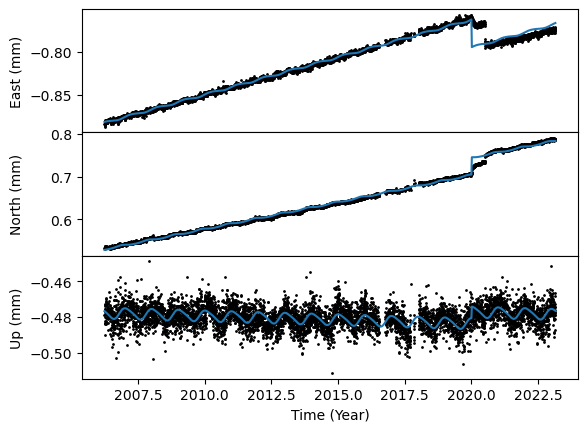

In [6]:
# ----------------
# step function
def hfunc(t):
    if t < 2020.0164:
        return 0.
    if t > 2020.0164:
        return 1.
    else:
        return 0.5
hfunc = np.vectorize(hfunc)
# ----------------

# ----------------
# step function
def hfunc1(t):
    if t < 2021.0164:
        return 0.
    if t > 2021.0164:
        return 1.
    else:
        return 0.5
hfunc1 = np.vectorize(hfunc1)
# ----------------


o = np.pi*2
A = np.concatenate((np.ones((n,1)), time, np.sin(time*o), np.cos(time*o), np.sin(2*o*time), np.cos(2*o*time), hfunc(time)), axis=1)


fig, ax = plt.subplots(3, 1, sharex=True)
ax[0].plot(time, east , "ko", markersize=1);
ax[0].set_ylabel("East (mm)")
ax[1].plot(time, north, "ko", markersize=1);
ax[1].set_ylabel("North (mm)")
ax[2].plot(time, up   , "ko", markersize=1)
ax[2].set_ylabel("Up (mm)"); ax[2].set_xlabel("Time (Year)")
fig.subplots_adjust(hspace=.0); fig.align_labels(ax[:])

# east
N = np.matmul(A.T, np.linalg.inv(qeast))
N = np.matmul(N, A)
coef = np.matmul(np.linalg.inv(N), A.T)
coef = np.matmul(coef, np.linalg.inv(qeast))
coef = np.matmul(coef, east)
x = np.linspace(min(time), max(time), 1000)
y = coef[0] + coef[1]*x + coef[2]*np.sin(o*x) + coef[3]*np.cos(o*x) + coef[4]*np.sin(2*o*x) + coef[5]*np.cos(2*o*x) + coef[6]*hfunc(x)
ax[0].plot(x,y)

# north
N = np.matmul(A.T, np.linalg.inv(qnorth))
N = np.matmul(N, A)
coef = np.matmul(np.linalg.inv(N), A.T)
coef = np.matmul(coef, np.linalg.inv(qnorth))
coef = np.matmul(coef, north)
x = np.linspace(min(time), max(time), 1000)
y = coef[0] + coef[1]*x + coef[2]*np.sin(o*x) + coef[3]*np.cos(o*x) + coef[4]*np.sin(2*o*x) + coef[5]*np.cos(2*o*x) + coef[6]*hfunc(x)
ax[1].plot(x,y)

# up
N = np.matmul(A.T, np.linalg.inv(qup))
N = np.matmul(N, A)
coef = np.matmul(np.linalg.inv(N), A.T)
coef = np.matmul(coef, np.linalg.inv(qup))
coef = np.matmul(coef, up)
x = np.linspace(min(time), max(time), 1000)
y = coef[0] + coef[1]*x + coef[2]*np.sin(o*x) + coef[3]*np.cos(o*x) + coef[4]*np.sin(2*o*x) + coef[5]*np.cos(2*o*x) + coef[6]*hfunc(x)
ax[2].plot(x,y)